In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("train.csv")
df
np.where(pd.isnull(df))
df.drop(index=7037,inplace=True)
df.dropna

<bound method DataFrame.dropna of                                              created_at  \
0     We are facing multiple issues related to road ...   
1     This is a really bad road. we need it cleaned ...   
2                          This needs to be fixed asap.   
3     We observed frequently heavy traffic at dahisa...   
4     A pothole in front of Chand Shahwli Baba Darga...   
5     Garbage has been piling up near the Boat house...   
6     This is on the road while coming towards royal...   
7     Potholes uneven road in front of Riddhi Garden...   
8     Killer pitholes throughout from marol to saki ...   
9     From ghatkopar west station to jagdusha nagar ...   
10    Lots off potholes on service road of magatgane...   
11    Lots off potholes on service road of magatgane...   
12    In my slum area the garbage collection system ...   
13    Would request the authorities to provide more ...   
14    Road is narrow and huge truck ,bus ,car,auto a...   
15                    

In [24]:
col = ['category', 'description']
df= df[col]
df= df[pd.notnull(df['description'])]

In [25]:
df.columns=['category', 'description']

In [26]:
import matplotlib.pyplot as plt

In [27]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

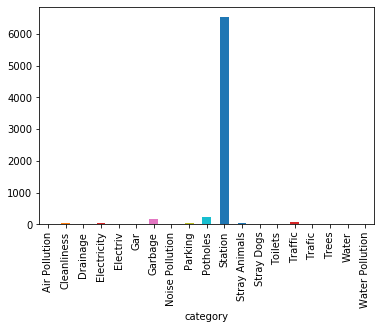

In [28]:
df.groupby('category').description.count().plot.bar(ylim=0)

In [45]:

df['category_id'] = df['category'].factorize()[0] 
cat_id_df = df[["category", "category_id"]].drop_duplicates().sort_values('category_id')
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['category_id','category']].values)
cat_id_df

,category,category_id
0,Potholes,0
1,Garbage,1
2,Traffic,2
15,Water,3
16,Toilets,4
26,Stray Animals,5
32,Noise Pollution,6
34,Electricity,7
49,Air Pollution,8
53,Cleanliness,9


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [31]:
features = tfidf.fit_transform(df.description).toarray()

In [32]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['category'], random_state= 0)


7181

In [34]:
from sklearn.feature_extraction.text import CountVectorizer


In [35]:
count_vect = CountVectorizer()


In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

In [37]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
type(y_train)

pandas.core.series.Series

In [38]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [39]:
print(clf.predict(count_vect.transform(['There is station on the station'])))


['Station']


In [40]:
y_pred = clf.predict(count_vect.transform(X_test))

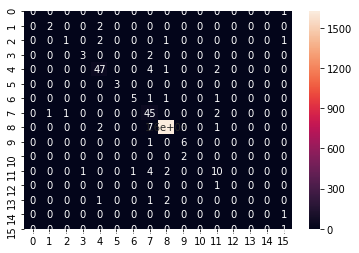

In [41]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [42]:
print(metrics.classification_report(y_test,y_pred, labels= df.category, target_names=df['category'].unique()))


                 precision    recall  f1-score   support

       Potholes       0.69      0.92      0.79        49
        Garbage       0.87      0.87      0.87        54
        Traffic       0.59      0.56      0.57        18
          Water       0.59      0.56      0.57        18
        Toilets       0.69      0.92      0.79        49
  Stray Animals       0.87      0.87      0.87        54
Noise Pollution       0.69      0.92      0.79        49
    Electricity       0.69      0.92      0.79        49
  Air Pollution       0.69      0.92      0.79        49
    Cleanliness       0.69      0.92      0.79        49
        Parking       0.69      0.92      0.79        49
Water Pollution       0.69      0.92      0.79        49
         Trafic       0.87      0.87      0.87        54
        Station       0.87      0.87      0.87        54
     Stray Dogs       0.69      0.92      0.79        49
       Drainage       0.00      0.00      0.00         1
          Trees       0.00    

C:\Users\TheEnigma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 7181, does not match size of target_names, 19
  .format(len(labels), len(target_names))
C:\Users\TheEnigma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\TheEnigma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [43]:
import pickle
with open("text_model.pkl", 'wb') as file:  
    pickle.dump(clf, file)
with open("text_model.pkl", 'rb') as file:  
    mp = pickle.load(file)
    
import pickle
with open("count_vect.pkl", 'wb') as file:  
    pickle.dump(count_vect, file)
with open("count_vect.pkl", 'rb') as file:  
    cou = pickle.load(file)    

In [44]:
mp.predict(count_vect.transform(['There is station on the station']))

array(['Station'], dtype=object)